In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
import os, glob
files_folder = "problem1/"
files = []
for file in glob.glob(os.path.join(files_folder ,"*.txt")):
                      table = pd.read_csv(file , delimiter=',',names=['Doing nothing', 'Eating', 'Ruminating','Walking'], index_col=False)
                      files.append(table)


df = pd.concat(files, keys=['cow {}'.format(i+1) for i in range(len(files))])
df

Doing nothing    Eating  Ruminating   Walking
cow 1  0          0.163131  0.499941    0.000000  0.336928
       1          0.098108  0.650174    0.020977  0.230742
       2          0.550739  0.335149    0.007132  0.106980
       3          0.065699  0.622836    0.074481  0.236985
       4          0.457155  0.318455    0.057907  0.166483
...                    ...       ...         ...       ...
cow 11 5995       0.060640  0.021277    0.903936  0.014147
       5996       0.116282  0.049385    0.778037  0.056296
       5997       0.701440  0.014866    0.239034  0.044660
       5998       0.964299  0.014280    0.007140  0.014280
       5999       0.649368  0.057426    0.228613  0.064593

[66000 rows x 4 columns]

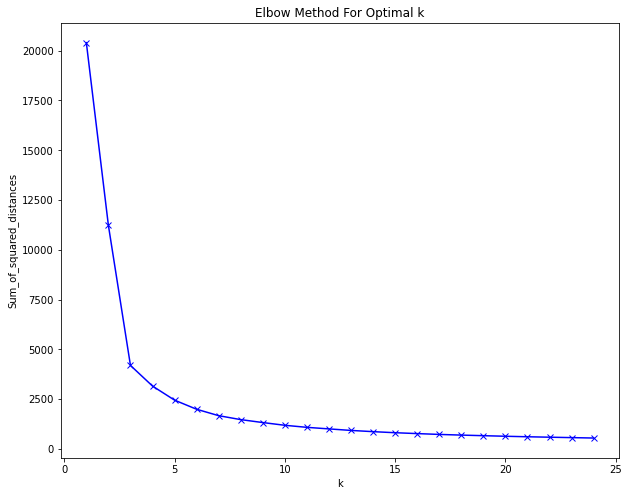

In [21]:
# finding currect number of clusters (elbow method)
##for decreasing the computation time, these codes were run one time and then i use the results in the next cell, which
###15 cluster is selected as optimum number of clusters.

n_cluster = range(1, 25)

squared_distances=[]
for k in n_cluster:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    squared_distances.append(km.inertia_)
plt.figure(figsize=(10,8))
plt.plot(n_cluster, squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [22]:
km=KMeans(n_clusters=15,n_init=50, init='k-means++')

In [23]:
clusters=km.fit_predict(df)
df['cluster'] = clusters
df['cluster'].value_counts()

3     10594
12     9681
8      5724
2      4585
4      4237
14     3949
5      3806
7      3797
9      3456
13     3215
1      3161
0      3050
10     2825
6      2209
11     1711
Name: cluster, dtype: int64

In [24]:
#distance of each data point to its cluster's centroid
from scipy.spatial.distance import cdist
data=['Doing nothing', 'Eating', 'Ruminating','Walking']
centroids = km.cluster_centers_
distances = []
for i, center in enumerate(centroids):
                     distances = np.append(distances, cdist([center],df[data][df['cluster'] == i], 'euclidean'))
                  

number of anomalies for cow 1 = 928
number of anomalies for cow 2 = 216
number of anomalies for cow 3 = 3
number of anomalies for cow 4 = 376
number of anomalies for cow 5 = 891
number of anomalies for cow 6 = 1453
number of anomalies for cow 7 = 524
number of anomalies for cow 8 = 1235
number of anomalies for cow 9 = 426
number of anomalies for cow 10 = 165
number of anomalies for cow 11 = 383


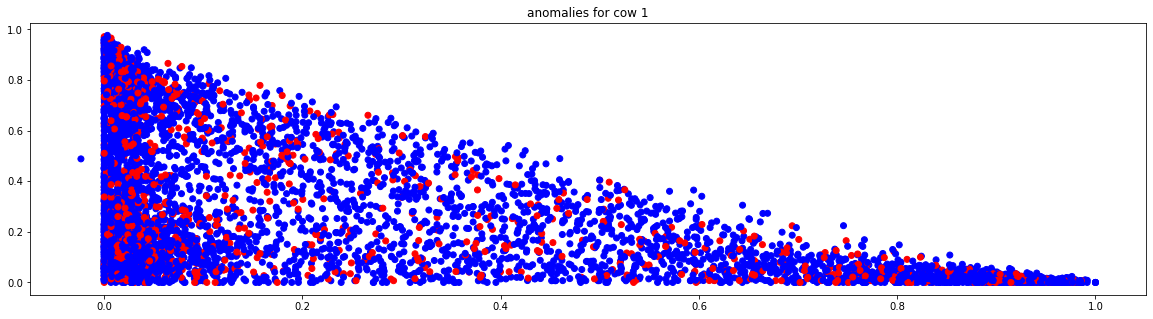

In [25]:
# getting outliers whose distances are greater than 90 percentile of all distances
df_1=df.copy()
df_1['distances']=distances
percentile = 90

outliers = df_1['distances']> np.percentile(df_1['distances'], percentile)
df_1['anomaly']=outliers.astype(int)

colors = {0:'blue', 1:'red'}
plt.figure(figsize=(20,5))
plt.scatter(df_1.loc['cow 1']['Doing nothing'],df_1.loc['cow 1']['Eating'], c=df_1.loc['cow 1']["anomaly"].apply(lambda x: colors[x]))
plt.title('anomalies for cow 1')
for i in range(1,12):
    print('number of anomalies for cow {} = {}'.format(i,sum(df_1.loc['cow {}'.format(i)]['anomaly']==1)))


              